In [21]:
import seaborn as sns
import matplotlib.pyplot as plt



In [23]:
print(matricula.isnull().sum())
print(docente.isnull().sum())
print(turma.isnull().sum())
print(escola.isnull().sum())

# Excluir ou preencher dados ausentes
matricula = matricula.dropna(subset=['id_turma', 'id_escola', 'id_aluno'])
docente = docente.dropna(subset=['id_docente', 'id_turma', 'id_escola'])
turma = turma.dropna(subset=['id_turma', 'id_escola'])
escola = escola.dropna(subset=['id_escola'])

0
ano                               0
sigla_uf                          0
id_municipio                      0
id_distrito                       0
id_escola                         0
                               ... 
mediacao_didatico_pedagogica      0
unificada                         0
tipo_atendimento_turma          500
tipo_local_turma                500
tipo_turma                        0
Length: 96, dtype: int64
0
ano                                0
sigla_uf                           0
id_municipio                       0
rede                               0
id_escola                          0
                                ... 
mant_escola_privada_sist_s       500
mant_escola_privada_s_fins         0
tipo_regulamentacao                0
tipo_localizacao_diferenciada      0
educacao_indigena                  0
Length: 126, dtype: int64
0
ano                                 0
sigla_uf                            0
id_municipio                        0
rede                      

In [24]:
# Garantir tipos numéricos
matricula['id_turma'] = pd.to_numeric(matricula['id_turma'], errors='coerce')
docente['id_turma'] = pd.to_numeric(docente['id_turma'], errors='coerce')
turma['id_turma'] = pd.to_numeric(turma['id_turma'], errors='coerce')


In [25]:
# Número de alunos por turma
alunos_por_turma = matricula.groupby('id_turma').size().reset_index(name='num_alunos')

# Número de docentes por turma
docentes_por_turma = docente.groupby('id_turma').size().reset_index(name='num_docentes')

# Juntar com a base de turma
turma = turma.merge(alunos_por_turma, on='id_turma', how='left')
turma = turma.merge(docentes_por_turma, on='id_turma', how='left')

# Preencher valores nulos com 0
turma['num_alunos'] = turma['num_alunos'].fillna(0).astype(int)
turma['num_docentes'] = turma['num_docentes'].fillna(0).astype(int)


In [26]:
print(turma[['id_turma', 'num_alunos', 'num_docentes']].head())


   id_turma  num_alunos  num_docentes
0       NaN           0             0
1  666559.0           0             0
2  666473.0           0             0
3  667319.0           0             0
4  671734.0           0             0


In [16]:
import pandas as pd

# Carregar os arquivos
escola = pd.read_excel("escola.xlsx")
docente = pd.read_excel("docente.xlsx")
turma = pd.read_excel("turma.xlsx")
matricula = pd.read_excel("matricula.xlsx")

def limpar_tabela(df):
    # Usa a segunda linha como cabeçalho real
    df.columns = df.iloc[0]
    df = df.drop(index=0).reset_index(drop=True)

    # Remove colunas vazias
    df = df.dropna(axis=1, how='all')

    # Padroniza os nomes das colunas
    df.columns = (
        df.columns.str.strip()
                  .str.lower()
                  .str.replace(" ", "_")
                  .str.normalize('NFKD')
                  .str.encode('ascii', errors='ignore')
                  .str.decode('utf-8')
    )

    return df

# Aplicar a limpeza
escola_limpa = limpar_tabela(escola)
docente_limpa = limpar_tabela(docente)
turma_limpa = limpar_tabela(turma)
matricula_limpa = limpar_tabela(matricula)

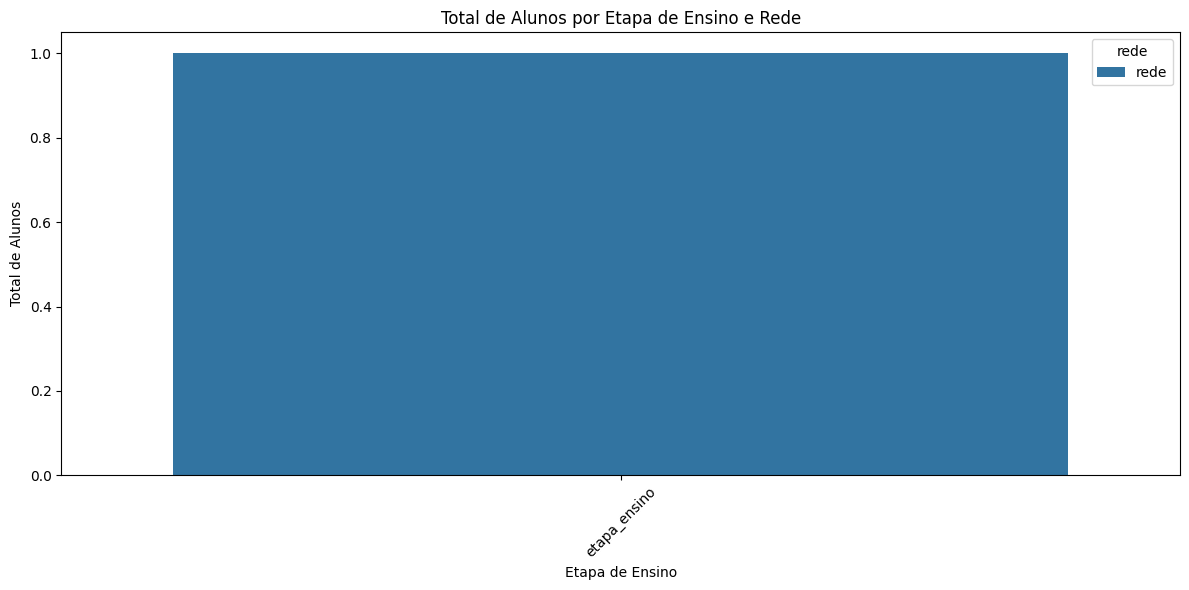

In [22]:
# Merge matricula + turma
df_merged = pd.merge(matricula, turma, on=['id_escola', 'id_turma', 'sigla_uf'], how='left')

# Merge com escola
df_merged = pd.merge(df_merged, escola, on=['id_escola', 'sigla_uf'], how='left')

# Merge com docente
df_merged = pd.merge(
    df_merged, docente,
    on=['id_escola', 'id_turma', 'sigla_uf'],
    how='left',
    suffixes=('_mat', '_doc')
)


# 7. MOSTRAR UMA AMOSTRA DOS DADOS CRUZADOS
df_merged.head()

# 8. EXEMPLO DE ANÁLISE CRUZADA
# Quantidade de alunos por etapa de ensino e rede
resumo = df_merged.groupby(['etapa_ensino', 'rede_x']).agg({
    'id_aluno': 'count'
}).reset_index().rename(columns={
    'id_aluno': 'total_alunos',
    'rede_x': 'rede'
})

# 9. VISUALIZAÇÃO
plt.figure(figsize=(12, 6))
sns.barplot(data=resumo, x='etapa_ensino', y='total_alunos', hue='rede')
plt.title("Total de Alunos por Etapa de Ensino e Rede")
plt.xlabel("Etapa de Ensino")
plt.ylabel("Total de Alunos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()